<br>
<img src="data/logo.png" alt="Logo" style="width:300px"/>

# **Streaming Churn Analysis**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
<b>🍿 Nerdflix</b> (empresa ficticia) nació en 2011 como una tienda internacional de souvenirs frikis especializada en Juego de Tronos. En 2018, con la finalización de la serie, decidió pivotar al mundo online hasta convertirse en el mayor repositorio de películas y series frikis y nerd nunca visto.
<br><br>
Sin embargo, la cancelación de suscripciones se ha disparado en los últimos meses, lo cual ha planteado interrogantes sobre los factores detrás de esta tendencia.
</div>

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
<b>⚠ Disclaimer</b>: Los datos empleados han sido generados de manera sintética y ya han sido agregados. Al ser datos sintéticos, no se ha tenido en cuenta la influencia de la pandemia en el análisis.
</div>

---

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lectura de datasets
df_suscripciones = pd.read_csv('./data/suscripciones.csv', encoding='latin1', sep=';')
df_clientes = pd.read_csv('./data/clientes.csv', encoding='latin1', sep=';')
df_satisfaccion = pd.read_csv('./data/satisfaccion_clientes.csv', encoding='latin1', sep=';')
df_oferta = pd.read_csv('./data/oferta.csv', encoding='latin1', sep=';')
df_precio = pd.read_csv('./data/precio.csv', encoding='latin1', sep=';')
df_consumo = pd.read_csv('./data/consumo.csv', encoding='latin1', sep=';')
df_tecnologia = pd.read_csv('./data/tecnologia.csv', encoding='latin1', sep=';')
df_sac = pd.read_csv('./data/sac.csv', encoding='latin1', sep=';')
df_marketing = pd.read_csv('./data/marketing.csv', encoding='latin1', sep=';')
df_kpis = pd.read_csv('./data/kpis.csv', encoding='latin1', sep=';')
df_fuentes_externas = pd.read_csv('./data/fuentes_externas.csv', encoding='latin1', sep=';')

In [3]:
# Normalización de los nombres de las columnas
df_clientes = df_clientes.rename(columns={'ï»¿ID CLIENTE':'ID CLIENTE','COMPAÃIA INTERNET':'COMPAÑIA INTERNET'})
df_satisfaccion = df_satisfaccion.rename(columns={'ï»¿AÃO':'AÑO'})
df_consumo = df_consumo.rename(columns={'ï»¿AÃO':'AÑO'})
df_tecnologia = df_tecnologia.rename(columns={'ï»¿AÃO':'AÑO'})
df_fuentes_externas = df_fuentes_externas.rename(columns={'ï»¿AÃO':'AÑO'})

In [4]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

## **1 - 🚩 Definición del problema**

In [5]:
df_suscripciones.tail(5)

,AÑO,MES,ALTAS,BAJAS,SUSCRIPCIONES ACTIVAS,SUSCRIPCIONES INCREMENTO INTERMENSUAL,SUSCRIPCIONES NORMALIZADAS (MÁX),SUSCRIPCIONES NORMALIZADAS (MEDIA),RATIO BAJAS VS. ALTAS
43,2021,8,987,99,30659,"0,029827685","1,127708096","1,664806112","0,100303951"
44,2021,9,1317,109,31867,"0,039401155","1,172141097","1,730401396","0,082763857"
45,2021,10,1193,638,32422,"0,017416136","1,192555265","1,760538301","0,534786253"
46,2021,11,1155,487,33090,"0,020603294","1,217125832","1,79681119","0,421645022"
47,2021,12,1278,1001,33367,"0,008371109","1,227314525","1,811852492","0,783255086"


### 1.1 - Evolución de las suscripciones

In [6]:
# Creación de columna 'Año-Mes'
df_suscripciones['AÑO-MES'] = df_suscripciones['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_suscripciones['AÑO'].astype(str)
# Creación de columna 'Trimestre'
df_suscripciones['TRIMESTRE'] = df_suscripciones['MES'].apply(lambda mes: 'T1' if mes in [1, 2, 3] else ('T2' if mes in [4, 5, 6] else ('T3' if mes in [7, 8, 9] else 'T4')))

In [7]:
# Nº de suscripciones por trimestre
suscripciones_trimestre = df_suscripciones.groupby(['TRIMESTRE', 'AÑO']).agg({'SUSCRIPCIONES ACTIVAS': 'sum'})
suscripciones_trimestre = suscripciones_trimestre.sort_values(by=['AÑO', 'TRIMESTRE']).reset_index()

# Concatenación entre año y trimestre
suscripciones_trimestre['AÑO-TRIM'] = suscripciones_trimestre['TRIMESTRE'] + ' ' + suscripciones_trimestre['AÑO'].astype(str)

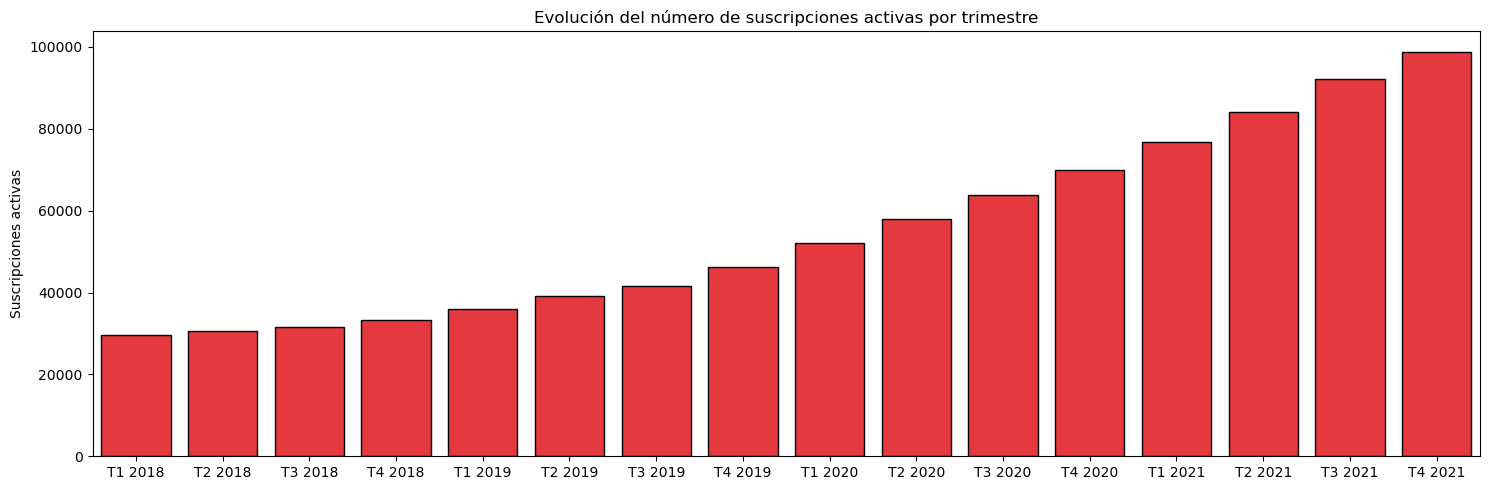

In [8]:
plt.figure(figsize=(15, 5)) # Ajuste del tamaño del gráfico

# Gráfico de barras con la evolución de las suscripciones activas por trimestre
sns.barplot(data=suscripciones_trimestre, x='AÑO-TRIM', y='SUSCRIPCIONES ACTIVAS', color='#FF1D25', edgecolor='#000000')

# Título y etiquetas de los ejes
plt.title('Evolución del número de suscripciones activas por trimestre')
plt.xlabel('')
plt.ylabel('Suscripciones activas')

plt.tight_layout()
plt.show()

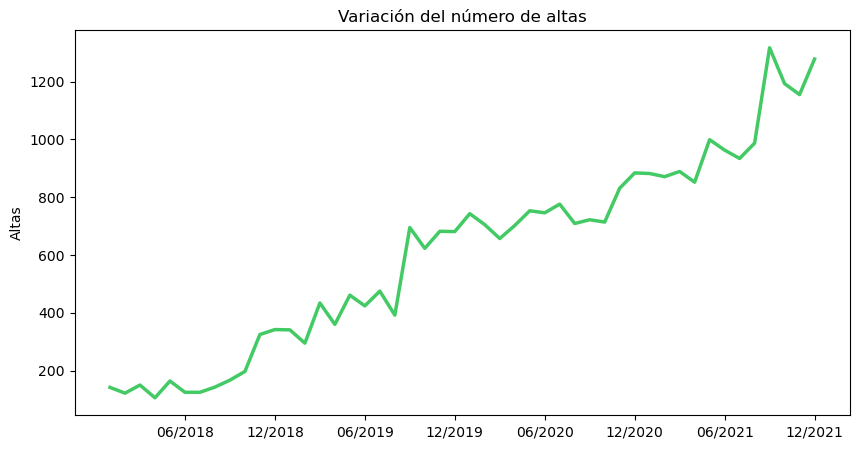

In [9]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráfico de líneas con la evolución de las altas
sns.lineplot(data=df_suscripciones, x='AÑO-MES', y='ALTAS', color='#43CA65', linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Variación del número de altas')
plt.xlabel('')
plt.ylabel('Altas')
plt.xticks(range(5, len(df_suscripciones), 6)) # Intervalos de separación para las etiquetas en el eje x

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
La evolución del número de suscripciones activas y de altas ha mantenido una tendencia mayormente ascendente a lo largo del tiempo. Esta información refleja que la compañía ha experimento un crecimiento constante en la base de usuarios de la compañía.
<br><br>
No obstante, es importante cuestionar esta apreciación inicial y llevar a cabo un análisis más profundo que nos permita identificar de manera precisa el problema por el que Nerdflix atraviesa en la actualidad.
</div>

### 1.2 - Evolución de las cancelaciones

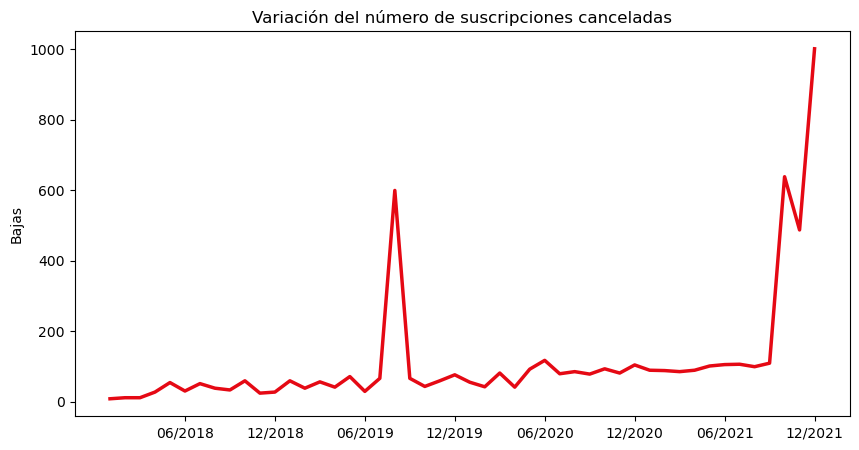

In [10]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráfico de líneas con la evolución de las bajas
sns.lineplot(data=df_suscripciones, x='AÑO-MES', y='BAJAS', color='#E50914', linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Variación del número de suscripciones canceladas')
plt.xlabel('')
plt.ylabel('Bajas')
plt.xticks(range(5, len(df_suscripciones), 6)) # Intervalos de separación para las etiquetas en el eje x

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Al observar los datos de bajas de suscripciones en Nerdflix, se evidencia un <u>incremento en las bajas durante el último trimestre</u>, con una media mensual de 709 cancelaciones en este período, que resulta sorprendente en comparación con la media de 75 cancelaciones en los anteriores 45 meses.
<br><br>
Esta tendencia invita a un análisis más profundo para identificar las causas que pueden estar contribuyendo a este aumento en las bajas de suscripciones.
</div>

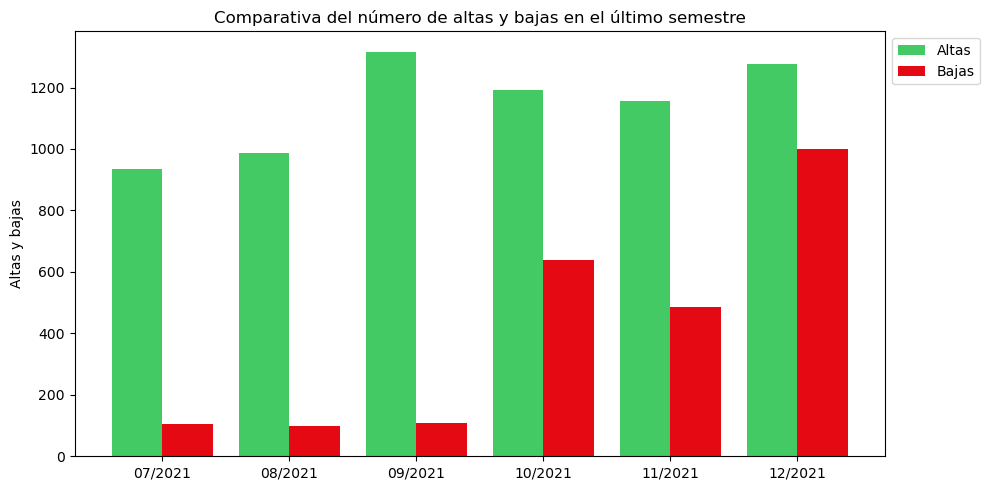

In [11]:
# Selección de las suscripciones de últimos 6 meses
suscripciones_semestre = df_suscripciones.tail(6)

fig, ax = plt.subplots(figsize=(10,5)) # Ajuste del tamaño del gráfico

# Ajuste de la posición de las barras de altas y bajas
bar_altas = [pos - 0.4 / 2 for pos in range(len(suscripciones_semestre))]
bar_bajas = [pos + 0.4 / 2 for pos in range(len(suscripciones_semestre))]

# Gráfico de barras con altas y bajas en los últimos 6 meses
ax.bar(bar_altas, suscripciones_semestre['ALTAS'], width=0.4, label='Altas', color='#43CA65')
ax.bar(bar_bajas, suscripciones_semestre['BAJAS'], width=0.4, label='Bajas', color='#E50914')

# Título y etiquetas de los ejes
plt.title('Comparativa del número de altas y bajas en el último semestre')
plt.xlabel('')
plt.ylabel('Altas y bajas')
plt.xticks(range(len(suscripciones_semestre)), suscripciones_semestre['AÑO-MES']) # Etiquetas personalizadas en el eje x
# Leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

### 1.3 - Perfiles de usuarios que cancelan su suscripción

In [12]:
df_clientes.head(5)

,ID CLIENTE,ANTIGUEDAD (MESES),BAJA,PLAN,PERFILES,PERFIL KIDS,EDAD,DESCARGA CONTENIDO,METODO PAGO,DISPOSITIVO MAS USADO,COMPAÑIA INTERNET,SEGMENTO,PREFERENCIA PELICULAS O SERIES
0,C-000001,23.0,No,Premium,2.0,No,69.0,No,Tarjeta,Smart TV,Vodafone,A,Peliculas
1,C-000002,6.0,No,Estandar,1.0,No,32.0,Si,Tarjeta,Otros,Movistar,B,Peliculas
2,C-000003,8.0,No,Estandar,3.0,No,45.0,No,PayPal,Otros,Orange,C,Peliculas
3,C-000004,16.0,No,Estandar,3.0,Si,38.0,No,Tarjeta,Chromecast o similar,Movistar,C,Peliculas
4,C-000005,6.0,No,Estandar,1.0,Si,39.0,No,PayPal,iPad,Movistar,C,Peliculas


In [13]:
# Nº de bajas del dataset de clientes
cond_baja = df_clientes['BAJA'] == 'Si'
n_bajas_clientes = df_clientes[cond_baja]['BAJA'].count()

# Nº de bajas del dataset de suscripciones
n_bajas_suscripciones = df_suscripciones['BAJAS'].tail(1).iloc[0]

# Verificación del nº de bajas entre el dataset de clientes y el de suscripciones
n_bajas_clientes == n_bajas_suscripciones

True

In [14]:
# Nº de bajas en cada segmento de clientes
clientes_baja = df_clientes[cond_baja].groupby('SEGMENTO').agg({'BAJA':'count'}).reset_index()
clientes_baja = clientes_baja.append(pd.DataFrame({'SEGMENTO':['C','D'], 'BAJA':[0,0]})).reset_index(drop=True)

clientes_baja

,SEGMENTO,BAJA
0,A,203
1,B,798
2,C,0
3,D,0


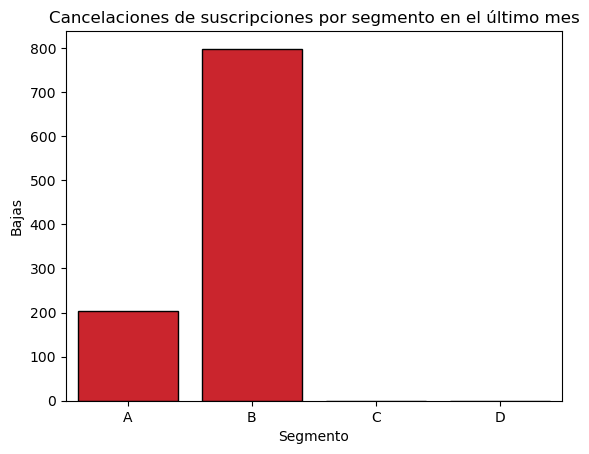

In [15]:
# Gráfico de barras con las bajas por segmento en el último mes
sns.barplot(data=clientes_baja, x='SEGMENTO', y='BAJA', color='#E50914', edgecolor='#000000')

# Título y etiquetas de los ejes
plt.title('Cancelaciones de suscripciones por segmento en el último mes')
plt.xlabel('Segmento')
plt.ylabel('Bajas')

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Para profundizar más en el análisis previo sobre el aumento de las bajas en los últimos tres meses, se ha obtenido los segmentos de clientes que se han dado de baja en el último mes en Nerdflix. En relación a esto, los datos revelan que <u>los focos de fuga se encuentran en el segmento A y, especialmente, en el B</u>, por lo que habrá que enfocar los esfuerzos a retener a este tipo de usuarios.
</div>

In [16]:
# Edad media de los segmentos
clientes_edad = df_clientes.groupby('SEGMENTO').agg({'EDAD':'mean'}).reset_index()
clientes_edad['EDAD'] = round(clientes_edad['EDAD'])

clientes_edad

,SEGMENTO,EDAD
0,A,81.0
1,B,35.0
2,C,37.0
3,D,24.0


<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Asimismo, es relevante destacar que la tipología de usuarios del segmento A es complemente distinta que la del segmento B. Mientras que el segmento B tiene un promedio de edad de 35 años, el segmento A presenta una media de edad mucho más alta, con 81 años de media.
</div>

In [17]:
# Condiciones para filtrar por los segmentos A y B
cond_A = df_clientes['SEGMENTO'] == 'A'
cond_B = df_clientes['SEGMENTO'] == 'B'

# Dispositivos más usados por los segmentos A y B
df_clientes[cond_A | cond_B].groupby('SEGMENTO')['DISPOSITIVO MAS USADO'].value_counts().to_frame(name='NUMERO DE DISPOSITIVOS')

NUMERO DE DISPOSITIVOS
SEGMENTO DISPOSITIVO MAS USADO                        
A        Smart TV                                 5395
         Otros                                     585
B        PC                                       6258
         Smart TV                                 2514
         Chromecast o similar                     2451
         Otros                                    1248

In [18]:
# Compañías de internet de los clientes
df_clientes['COMPAÑIA INTERNET'].value_counts(normalize=True).round(2).to_frame(name='PORCENTAJE DE CUOTA')

,PORCENTAJE DE CUOTA
Movistar,0.47
Vodafone,0.19
Orange,0.17
Pepephone,0.09
Jazztel,0.09


## **2 - 🔎 Identificación de causas**

### 2.1 - Contenido favorito de clientes

In [19]:
df_consumo.tail(5)

,AÑO,MES,SESIONES,MEDIA SESIONES ABIERTAS SIMULTANEAS,MAX. SESIONES SIMULTANEAS,MIN. SESIONES SIMULTANEAS,PELICULAS VISTAS,SERIES (CAPITULOS) VISTAS,DURACION MEDIA SESION (SEGMENTO A),DURACION MEDIA SESION (SEGMENTO B),DURACION MEDIA SESION (SEGMENTO C),DURACION MEDIA SESION (SEGMENTO D),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO A),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO B),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO C),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO D),PELICULAS GENERO MAS VISTO (SEGMENTO A),PELICULAS GENERO MAS VISTO (SEGMENTO B),PELICULAS GENERO MAS VISTO (SEGMENTO C),PELICULAS GENERO MAS VISTO (SEGMENTO D),SERIES GENERO MAS VISTO (SEGMENTO A),SERIES GENERO MAS VISTO (SEGMENTO B),SERIES GENERO MAS VISTO (SEGMENTO C),SERIES GENERO MAS VISTO (SEGMENTO D),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO A),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO B),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO C),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO D),MOMENTO DEL DIA FAVORITO (SEGMENTO A),MOMENTO DEL DIA FAVORITO (SEGMENTO B),MOMENTO DEL DIA FAVORITO (SEGMENTO C),MOMENTO DEL DIA FAVORITO (SEGMENTO D),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO A),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO B),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO C),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO D)
43,2021,8,578296,4760,13036,1725,34966,69398,37,161,75,22,653,37,553,323,Infantil,Fantasia,Infantil,Infantil,Infantil,Ciencia ficcion,Infantil,Romantico,"0,83","0,98","0,62","0,31",Tarde,Noche,Tarde,MaÃ±ana,4,25,11,14
44,2021,9,821860,7799,18231,2688,49538,122310,31,116,78,18,1119,117,579,302,Accion,Ciencia ficcion,Infantil,Romantico,Aventura,Ciencia ficcion,Infantil,Romantico,"0,85","0,63","0,66","0,32",MaÃ±ana,Noche,Tarde,MaÃ±ana,8,23,14,18
45,2021,10,704452,7036,18258,2469,43748,104297,33,109,72,23,1356,190,550,286,Aventura,Ciencia ficcion,Infantil,Romantico,Accion,Ciencia ficcion,Infantil,Romantico,"0,82","0,56","0,58","0,27",MaÃ±ana,Noche,Tarde,MaÃ±ana,7,23,14,18
46,2021,11,792289,7560,18024,2486,42390,96015,29,111,78,22,1234,221,644,296,Accion,Ciencia ficcion,Infantil,Romantico,Accion,Ciencia ficcion,Infantil,Romantico,"0,8","0,59","0,57","0,28",MaÃ±ana,MaÃ±ana,Tarde,MaÃ±ana,6,26,14,18
47,2021,12,704733,6411,19781,2365,44746,98712,30,117,73,17,1247,204,649,276,Accion,Ciencia ficcion,Infantil,Romantico,Aventura,Ciencia ficcion,Infantil,Romantico,"0,8","0,54","0,64","0,32",MaÃ±ana,Noche,Tarde,MaÃ±ana,6,25,15,17


In [20]:
# Películas y series más vistas por el segmento B
peliculas_b = df_consumo['PELICULAS GENERO MAS VISTO (SEGMENTO B)'].value_counts().to_frame()
series_b = df_consumo['SERIES GENERO MAS VISTO (SEGMENTO B)'].value_counts().to_frame()

# Combinación de películas y series favoritas del segmento B
contenido_b = peliculas_b.merge(series_b, left_index=True, right_index=True, how='left')
contenido_b

,PELICULAS GENERO MAS VISTO (SEGMENTO B),SERIES GENERO MAS VISTO (SEGMENTO B)
Ciencia ficcion,45,46
Fantasia,3,2


In [21]:
# Películas y series más vistas por el segmento A
peliculas_a = df_consumo['PELICULAS GENERO MAS VISTO (SEGMENTO A)'].value_counts().to_frame()
series_a = df_consumo['SERIES GENERO MAS VISTO (SEGMENTO A)'].value_counts().to_frame()

# Combinación de películas y series favoritas del segmento A 
contenido_a = peliculas_a.merge(series_a, left_index=True, right_index=True, how='left')
contenido_a

,PELICULAS GENERO MAS VISTO (SEGMENTO A),SERIES GENERO MAS VISTO (SEGMENTO A)
Accion,28,21
Aventura,16,23
Infantil,4,4


<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Para continuar con el análisis, se ha recopilado información sobre las preferencias de contenido en ambos segmentos:
    
- En el segmento B, el género de ciencia ficción es el más visto, por delante del de fantasía.
- Por otro lado, en el segmento A, el contenido de acción es el más popular, seguido muy de cerca por el de aventura.
</div>

### 2.2 - Duración media de las sesiones

In [22]:
# Creación de columna 'Año-Mes'
df_consumo['AÑO-MES'] = df_consumo['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_consumo['AÑO'].astype(str)

In [23]:
# Normalización de variable para convertirla a tipo float
df_consumo['REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO A)'] = df_consumo['REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO A)'].str.replace(',', '.').astype(float)
df_consumo['REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO B)'] = df_consumo['REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO B)'].str.replace(',', '.').astype(float)

In [24]:
df_consumo.head(5)

,AÑO,MES,SESIONES,MEDIA SESIONES ABIERTAS SIMULTANEAS,MAX. SESIONES SIMULTANEAS,MIN. SESIONES SIMULTANEAS,PELICULAS VISTAS,SERIES (CAPITULOS) VISTAS,DURACION MEDIA SESION (SEGMENTO A),DURACION MEDIA SESION (SEGMENTO B),DURACION MEDIA SESION (SEGMENTO C),DURACION MEDIA SESION (SEGMENTO D),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO A),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO B),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO C),TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO D),PELICULAS GENERO MAS VISTO (SEGMENTO A),PELICULAS GENERO MAS VISTO (SEGMENTO B),PELICULAS GENERO MAS VISTO (SEGMENTO C),PELICULAS GENERO MAS VISTO (SEGMENTO D),SERIES GENERO MAS VISTO (SEGMENTO A),SERIES GENERO MAS VISTO (SEGMENTO B),SERIES GENERO MAS VISTO (SEGMENTO C),SERIES GENERO MAS VISTO (SEGMENTO D),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO A),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO B),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO C),REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO D),MOMENTO DEL DIA FAVORITO (SEGMENTO A),MOMENTO DEL DIA FAVORITO (SEGMENTO B),MOMENTO DEL DIA FAVORITO (SEGMENTO C),MOMENTO DEL DIA FAVORITO (SEGMENTO D),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO A),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO B),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO C),FRECUENCIA (# SESIONES MENSUALES) (SEGMENTO D),AÑO-MES
0,2018,1,127500,779,2947,349,2135,3737,40,155,79,18,521,23,639,255,Accion,Ciencia ficcion,Infantil,Infantil,Accion,Ciencia ficcion,Infantil,Romantico,0.83,0.98,"0,67","0,35",MaÃ±ana,Noche,Tarde,MaÃ±ana,7,23,10,18,01/2018
1,2018,2,131190,782,3340,416,2826,3956,41,168,70,16,652,47,577,350,Accion,Ciencia ficcion,Infantil,Romantico,Aventura,Ciencia ficcion,Infantil,Romantico,0.75,0.97,"0,63","0,34",MaÃ±ana,Noche,Tarde,MaÃ±ana,7,22,10,17,02/2018
2,2018,3,150426,1315,3485,476,3716,5945,45,163,73,16,633,29,627,326,Aventura,Ciencia ficcion,Fantasia,Romantico,Aventura,Ciencia ficcion,Infantil,Romantico,0.75,0.97,"0,64","0,27",MaÃ±ana,Noche,Tarde,MaÃ±ana,8,22,10,18,03/2018
3,2018,4,170576,1426,4665,547,3822,7645,35,157,79,22,603,38,680,257,Accion,Ciencia ficcion,Infantil,Romantico,Aventura,Ciencia ficcion,Infantil,Romantico,0.83,0.98,"0,67","0,26",Tarde,Noche,Tarde,MaÃ±ana,8,22,11,18,04/2018
4,2018,5,166726,1344,4306,505,4564,7303,37,169,74,17,618,34,500,301,Aventura,Fantasia,Infantil,Romantico,Aventura,Ciencia ficcion,Infantil,Romantico,0.86,0.99,"0,59","0,35",Tarde,MaÃ±ana,Tarde,MaÃ±ana,9,23,10,18,05/2018


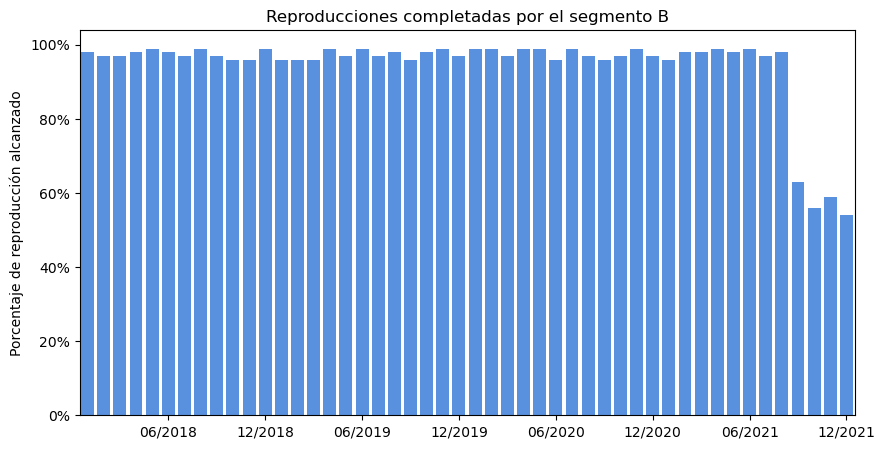

In [25]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con el porcentaje de reproduccciones completadas por el segmento B
sns.barplot(data=df_consumo, x='AÑO-MES', y='REPRODUCCIONES COMPLETADAS (% SOBRE EL TOTAL) (SEGMENTO B)', color='#448EF4')

# Título y etiquetas de los ejes
plt.title('Reproducciones completadas por el segmento B')
plt.xlabel('')
plt.ylabel('Porcentaje de reproducción alcanzado')
plt.xticks(range(5, len(df_consumo), 6)) # Intervalos de separación para las etiquetas en el eje x

# Configuración para agregar el signo de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

plt.show()

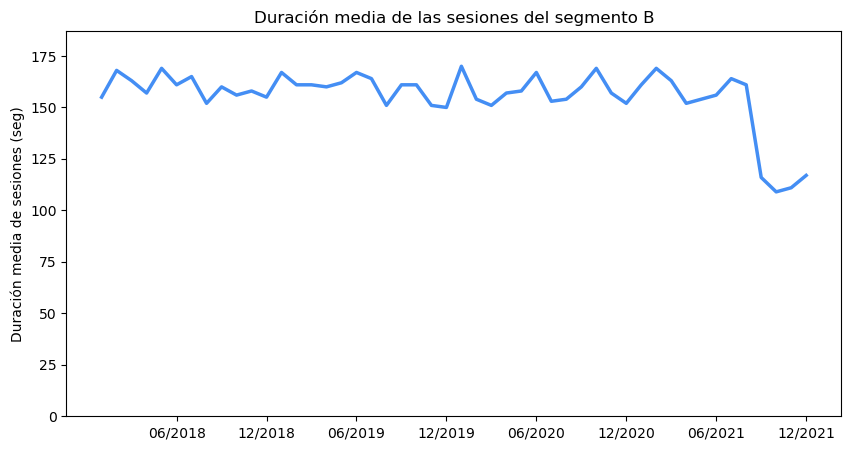

In [26]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con la duración media de las sesiones del segmento B
sns.lineplot(data=df_consumo, x='AÑO-MES', y='DURACION MEDIA SESION (SEGMENTO B)', color='#448EF4', linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Duración media de las sesiones del segmento B')
plt.xlabel('')
plt.ylabel('Duración media de sesiones (seg)')
plt.xticks(range(5, len(df_consumo), 6)) # Intervalos de separación para las etiquetas en el eje x
plt.ylim(0, max(df_consumo['DURACION MEDIA SESION (SEGMENTO B)']*1.1)) # Ajuste del límite del eje y

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Tomando en cuenta el comportamiento de los usuarios en relación al consumo de contenido en la plataforma, se ha detectado que el porcentaje de reproducciones completadas y la duración media de las sesiones han experimentado un notorio descenso desde septiembre de 2021. Este cambio en los patrones de consumo señala una posible conexión con el incremento en las cancelaciones de suscripciones en el segmento B.
</div>

### 2.3 - Tiempo medio de inicio sesión

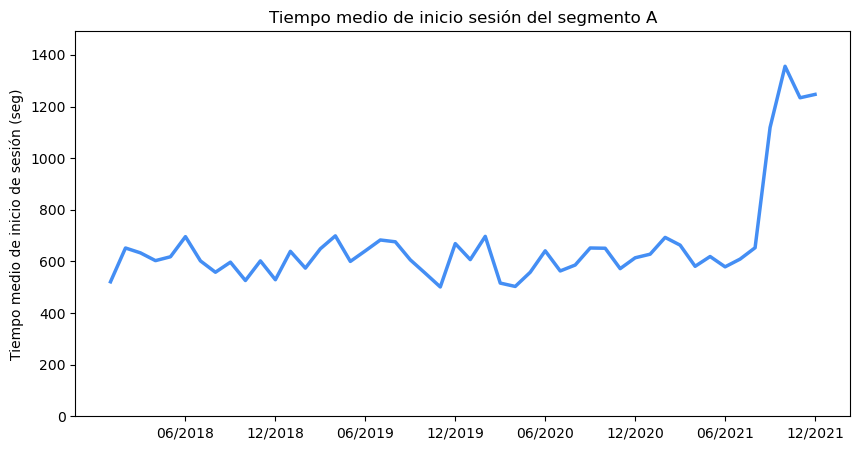

In [27]:
plt.figure(figsize = (10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con la duración media de las sesiones del segmento B
sns.lineplot(data=df_consumo, x='AÑO-MES', y='TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO A)', color='#448EF4', linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Tiempo medio de inicio sesión del segmento A')
plt.xlabel('')
plt.ylabel('Tiempo medio de inicio de sesión (seg)')
plt.xticks(range(5, len(df_consumo), 6)) # Intervalos de separación para las etiquetas en el eje x
plt.ylim(0, max(df_consumo['TIEMPO MEDIO INICIO SESION - REPRODUCCION (SEG) (SEGMENTO A)']*1.1)) # Ajuste del límite del eje y

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Al contrario que el B, el segmento A no ha experimento ningún cambio relevante en el porcentaje de reproducciones completadas o en la duración media de las sesiones. Sin embargo, sí que llama la atención un incremento muy significativo en el tiempo medio de inicio de sesión del segmento A, que tiene una media de edad de 81 años.
</div>

### 2.4 - Satisfacción de clientes

In [28]:
df_satisfaccion.tail(5)

,AÑO,MES,NPS (%) (SEGMENTO A),NPS (%) (SEGMENTO B),NPS (%) (SEGMENTO C),NPS (%) (SEGMENTO D)
43,2021,8,31,85,48,62
44,2021,9,7,31,47,71
45,2021,10,4,28,51,66
46,2021,11,9,25,55,67
47,2021,12,11,34,45,71


In [29]:
# Creación de columna 'Año-Mes'
df_satisfaccion['AÑO-MES'] = df_satisfaccion['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_satisfaccion['AÑO'].astype(str)

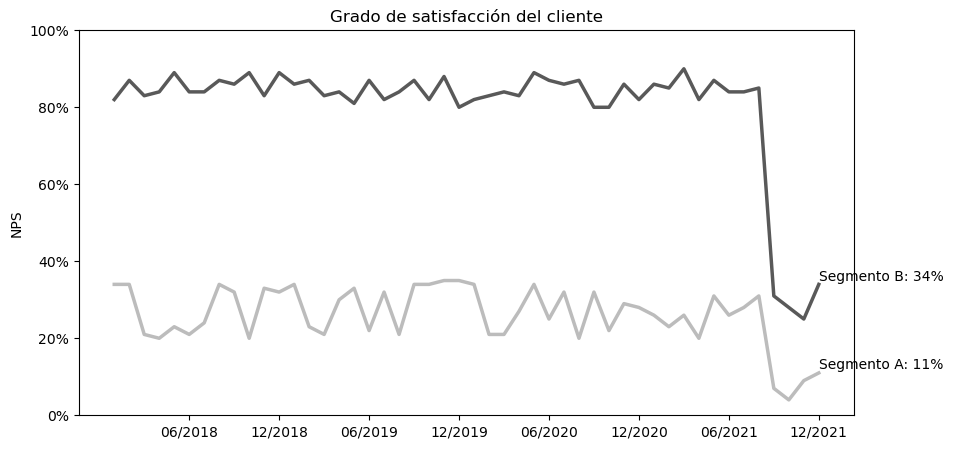

In [30]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con la satisfacción de los clientes del segmento A y B
sns.lineplot(data=df_satisfaccion, x='AÑO-MES', y='NPS (%) (SEGMENTO A)', color='#BCBCBC', linewidth=2.5)
sns.lineplot(data=df_satisfaccion, x='AÑO-MES', y='NPS (%) (SEGMENTO B)', color='#595959', linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Grado de satisfacción del cliente')
plt.xlabel('')
plt.ylabel('NPS')
plt.xticks(range(5, len(df_suscripciones), 6)) # Intervalos de separación para las etiquetas en el eje x
plt.ylim(0, 100) # Ajuste del límite del eje y

# Configuración para agregar el signo de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Último valor de cada línea
satisfaccion_a = df_satisfaccion['NPS (%) (SEGMENTO A)'].iloc[-1]
satisfaccion_b = df_satisfaccion['NPS (%) (SEGMENTO B)'].iloc[-1]

# Leyenda de cada línea
plt.text(len(df_satisfaccion) - 1, satisfaccion_a + 1, f'Segmento A: {int(satisfaccion_a)}%')
plt.text(len(df_satisfaccion) - 1, satisfaccion_b + 1, f'Segmento B: {int(satisfaccion_b)}%')

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
El nivel de satisfacción de los segmentos A y B ha sufrido una caída notable. Ha pasado de una puntuación relativamente estable, con un promedio de 85% para el B y de 28% para el A, a niveles más bajos, situándose en un promedio del 30% y 8%, respectivamente. Por lo tanto, hay ciertos aspectos del servicio que no han sido bien recibidos por los clientes.
</div>

### 2.5 - Oferta del catálogo

In [31]:
df_oferta.tail(5)

,AÑO,MES,PELICULAS DURACION MEDIA ('),SERIES DURACION MEDIA CAPITULO ('),PELICULAS DRAMA,PELICULAS COMEDIA,PELICULAS ACCION,PELICULAS AVENTURA,PELICULAS TERROR,PELICULAS SUSPENSE,PELICULAS ROMANTICO,PELICULAS CIENCIA FICCION,PELICULAS FANTASIA,PELICULAS INFANTIL,SERIES DRAMA,SERIES COMEDIA,SERIES ACCION,SERIES AVENTURA,SERIES TERROR,SERIES SUSPENSE,SERIES ROMANTICO,SERIES CIENCIA FICCION,SERIES FANTASIA,SERIES INFANTIL,PROMEDIO IMDB PELICULAS,PROMEDIO IMDB SERIES,PROMEDIO AÑO ESTRENO PELICULAS,PROMEDIO AÑO ESTRENO SERIES
43,2021,8,89,31,211,225,204,213,213,214,232,982,946,220,63,66,58,73,60,62,70,159,158,65,"6,4","6,6",2007,2011
44,2021,9,91,31,281,247,274,243,262,258,283,619,1172,253,83,77,68,85,69,64,98,141,169,73,"6,3","6,8",2004,2009
45,2021,10,94,31,278,294,224,280,248,266,304,525,1202,238,68,82,70,78,80,78,101,151,191,77,"5,9","6,3",2005,2007
46,2021,11,94,30,271,247,251,247,292,236,246,539,1252,244,81,77,68,80,77,70,93,152,208,74,"6,1","6,7",2005,2008
47,2021,12,94,29,246,282,259,286,256,298,284,501,1265,259,76,71,63,80,68,80,81,150,198,75,"5,9","6,7",2006,2009


In [32]:
# Creación de columna 'Año-Mes'
df_oferta['AÑO-MES'] = df_oferta['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_oferta['AÑO'].astype(str)

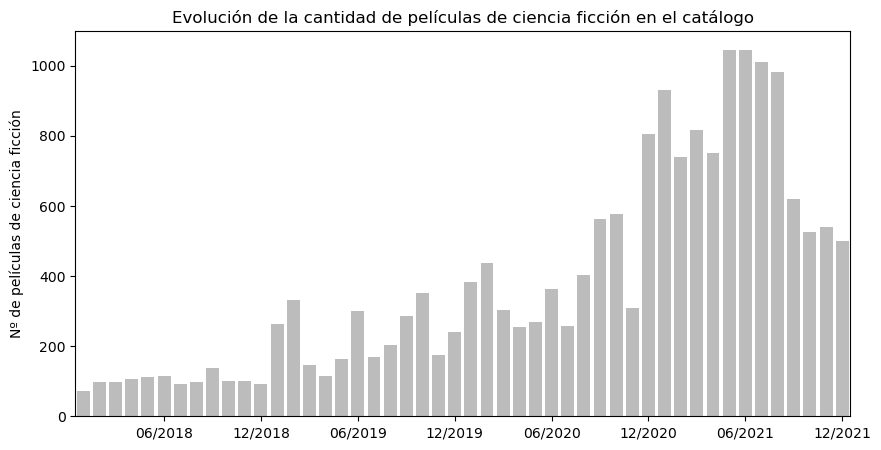

In [33]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con la cantidad de películas de ciencia ficción en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='PELICULAS CIENCIA FICCION', color='#BCBCBC')

# Título y etiquetas de los ejes
plt.title('Evolución de la cantidad de películas de ciencia ficción en el catálogo')
plt.xlabel('')
plt.ylabel('Nº de películas de ciencia ficción')
plt.xticks(range(5, len(df_oferta), 6)) # Intervalos de separación para las etiquetas en el eje x

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Analizando el contenido favorito del segmento B, se observa que en los últimos 4 meses ha habido un <u>descenso general en la cantidad de películas de ciencia ficción en el catálogo</u>. Esta reducción en la oferta de contenido puede ser la principal causa del descontento y la posible disminución en las suscripciones en dicho segmento.

</div>

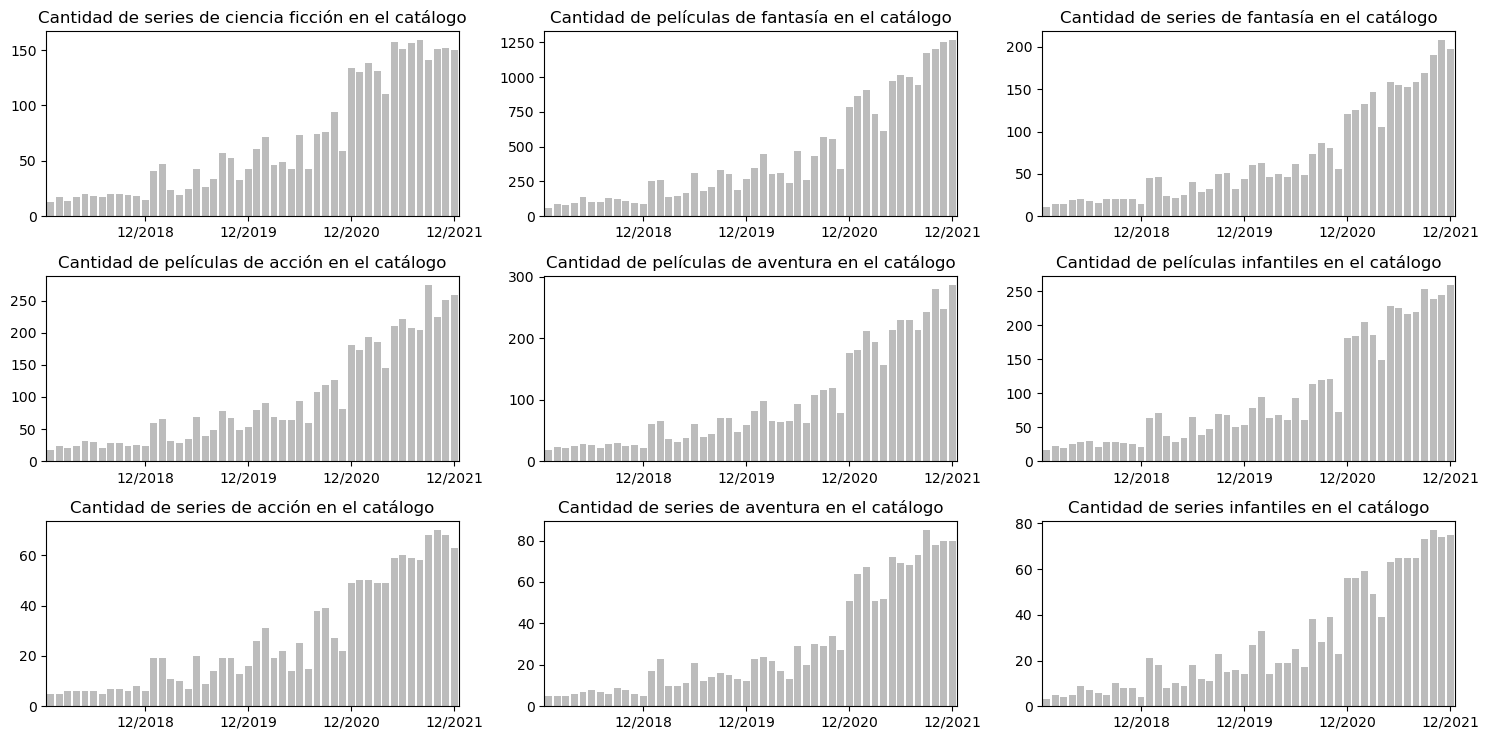

In [34]:
# Figura con 9 subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 7.5))

# Contenido favorito del segmento B:

# Gráfico de barras con la cantidad de series de ciencia ficción en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='SERIES CIENCIA FICCION', color='#BCBCBC', ax=ax1)
# Título y etiquetas de los ejes
ax1.set(title='Cantidad de series de ciencia ficción en el catálogo', xlabel='', ylabel='')
ax1.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con la cantidad de películas de fantasía en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='PELICULAS FANTASIA', color='#BCBCBC', ax=ax2)
# Título y etiquetas de los ejes
ax2.set(title='Cantidad de películas de fantasía en el catálogo', xlabel='', ylabel='')
ax2.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con cantidad de series de fantasía en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='SERIES FANTASIA', color='#BCBCBC', ax=ax3)
# Título y etiquetas de los ejes
ax3.set(title='Cantidad de series de fantasía en el catálogo', xlabel='', ylabel='')
ax3.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Contenido favorito del segmento A:

# Gráfico de barras con cantidad de películas de acción en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='PELICULAS ACCION', color='#BCBCBC', ax=ax4)
# Título y etiquetas de los ejes
ax4.set(title='Cantidad de películas de acción en el catálogo', xlabel='', ylabel='')
ax4.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con cantidad de películas de aventura en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='PELICULAS AVENTURA', color='#BCBCBC', ax=ax5)
# Título y etiquetas de los ejes
ax5.set(title='Cantidad de películas de aventura en el catálogo', xlabel='', ylabel='')
ax5.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con cantidad de películas infantiles en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='PELICULAS INFANTIL', color='#BCBCBC', ax=ax6)
# Título y etiquetas de los ejes
ax6.set(title='Cantidad de películas infantiles en el catálogo', xlabel='', ylabel='')
ax6.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con cantidad de series de acción en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='SERIES ACCION', color='#BCBCBC', ax=ax7)
# Título y etiquetas de los ejes
ax7.set(title='Cantidad de series de acción en el catálogo', xlabel='', ylabel='')
ax7.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con cantidad de series de aventura en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='SERIES AVENTURA', color='#BCBCBC', ax=ax8)
# Título y etiquetas de los ejes
ax8.set(title='Cantidad de series de aventura en el catálogo', xlabel='', ylabel='')
ax8.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de barras con cantidad de series infantiles en el catálogo
sns.barplot(data=df_oferta, x='AÑO-MES', y='SERIES INFANTIL', color='#BCBCBC', ax=ax9)
# Título y etiquetas de los ejes
ax9.set(title='Cantidad de series infantiles en el catálogo', xlabel='', ylabel='')
ax9.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

plt.tight_layout() # Ajuste del espaciado entre subplots
plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
En cuanto a los contenidos preferidos del segmento A y al resto del segmento B, no se han observado cambios significativos en el catálogo que puedan dar lugar a posibles descontentos. De modo que, en el caso del segmento A, la causa de las bajas no parece estar relacionada con cambios en la oferta de contenidos.
</div>

### 2.6 - Cambios tecnológicos en la plataforma

In [35]:
df_tecnologia.tail(5)

,AÑO,MES,CAMBIOS UX MoM (TV),CAMBIOS UX MoM (iPad),CAMBIOS UX MoM (Smarthphone),CAMBIOS UX MoM (Otros dispositivos)
43,2021,8,"0,02","0,03","0,01","0,01"
44,2021,9,"0,45","0,01","0,02","0,02"
45,2021,10,"0,19","0,05","0,02","0,04"
46,2021,11,0,"0,02","0,04","0,05"
47,2021,12,0,"0,04","0,05","0,04"


In [36]:
# Transformación de variables a tipo float
df_tecnologia['CAMBIOS UX MoM (TV)'] = df_tecnologia['CAMBIOS UX MoM (TV)'].str.replace(',', '.').astype(float)
df_tecnologia['CAMBIOS UX MoM (iPad)'] = df_tecnologia['CAMBIOS UX MoM (iPad)'].str.replace(',', '.').astype(float)
df_tecnologia['CAMBIOS UX MoM (Smarthphone)'] = df_tecnologia['CAMBIOS UX MoM (Smarthphone)'].str.replace(',', '.').astype(float)
df_tecnologia['CAMBIOS UX MoM (Otros dispositivos)'] = df_tecnologia['CAMBIOS UX MoM (Otros dispositivos)'].str.replace(',', '.').astype(float)

In [37]:
# Creación de columna 'Año-Mes'
df_tecnologia['AÑO-MES'] = df_tecnologia['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_tecnologia['AÑO'].astype(str)

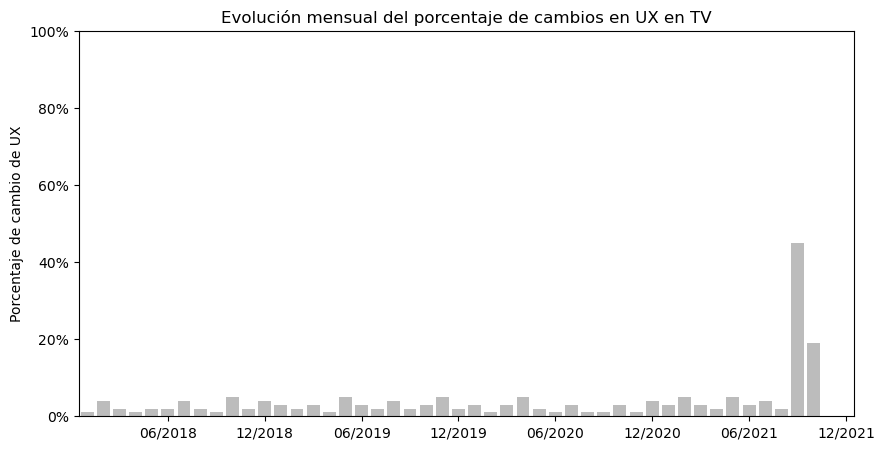

In [38]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráfico de barras con el porcentaje de cambios en UX en TV
sns.barplot(data=df_tecnologia, x='AÑO-MES', y='CAMBIOS UX MoM (TV)', color='#BCBCBC')

# Título y etiquetas de los ejes
plt.title('Evolución mensual del porcentaje de cambios en UX en TV')
plt.xlabel('')
plt.ylabel('Porcentaje de cambio de UX')
plt.xticks(range(5, len(df_tecnologia), 6)) # Intervalos de separación para las etiquetas en el eje x
plt.ylim(0, 1) # Ajuste del límite del eje y

# Configuración para agregar el signo de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Dado que el segmento A está compuesto principalmente por personas de edad avanzada, es posible que se vean impactadas por modificaciones en la experiencia del usuario. En este sentido, resulta destacable que <u>el dispositivo que ha experimentado los cambios más significativos en términos de experiencia de usuario es la televisión, siendo este dispositivo el más utilizado por el segmento A</u>.
<br><br>
Esta correlación entre los cambios en la experiencia de usuario en la televisión y la baja de usuarios del segmento A indica que estas modificaciones estén relacionadas con el descontento y las suscripciones canceladas.
</div>

In [39]:
df_sac.tail(5)

,AÑO,MES,INCIDENCIAS,PERSONAL CONTRATADO,AFRT (AVERAGE FIRST RESPONSE TIME) (MINUTOS),ART (AVERAGE RESOLUTION TIME) (MINUTOS)
43,2021,8,170,10,1091,"4145,8"
44,2021,9,478,10,1139,"3530,9"
45,2021,10,632,10,1123,"4042,8"
46,2021,11,587,10,1048,3668
47,2021,12,452,16,1058,3703


In [40]:
# Creación de columna 'Año-Mes'
df_sac['AÑO-MES'] = df_sac['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_sac['AÑO'].astype(str)

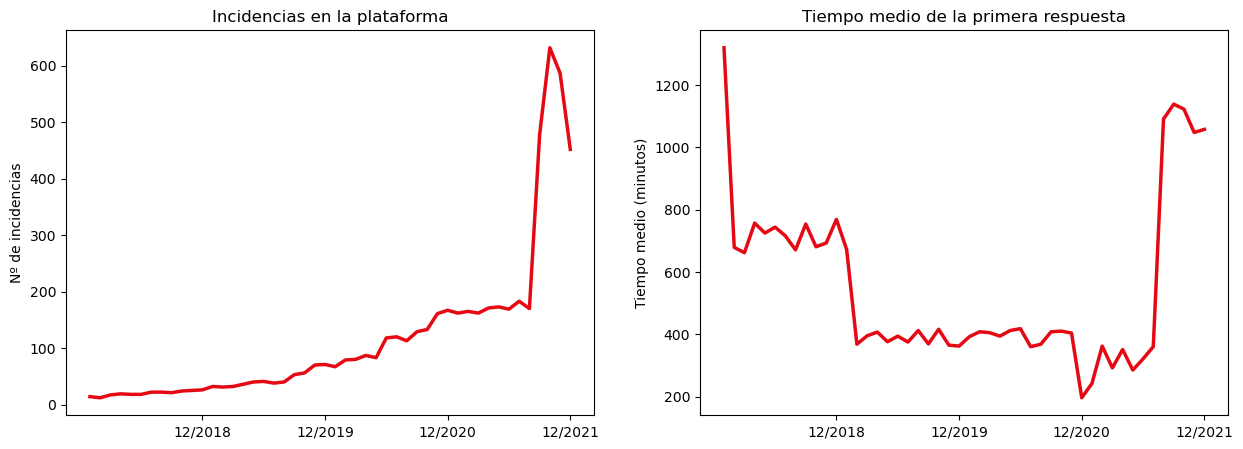

In [41]:
# Figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de líneas con la evolución del número de incidencias en la plataforma
sns.lineplot(data=df_sac, x='AÑO-MES', y='INCIDENCIAS', color='#E50914', linewidth=2.5, ax=ax1)
# Título y etiquetas de los ejes
ax1.set(title='Incidencias en la plataforma', xlabel='', ylabel='Nº de incidencias')
ax1.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

# Gráfico de líneas con el tiempo medio de la primera respuesta
sns.lineplot(data=df_sac, x='AÑO-MES', y='AFRT (AVERAGE FIRST RESPONSE TIME) (MINUTOS)', color='#E50914', linewidth=2.5, ax=ax2)
# Título y etiquetas de los ejes
ax2.set(title='Tiempo medio de la primera respuesta', xlabel='', ylabel='Tiempo medio (minutos)')
ax2.set_xticks(range(11, len(df_oferta), 12)) # Intervalos de separación para las etiquetas en el eje x

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Para una validación más sólida de las causas identificadas detrás del aumento en las cancelaciones, se ha examinado los datos del servicio de atención al consumidor. Al realizar esto, se puede constatar un notable aumento en las incidencias reportadas en la plataforma durante los meses que se han producido modificaciones en el catálogo de películas de ciencia ficción y las altas alteraciones en la experiencia de usuario en la televisión. Además, también se ha registrado un incremento del 194% en el tiempo promedio de la primera respuesta proporcionada a los usuarios.
</div>

### 2.7 - Precio

In [42]:
df_precio.tail(5)

,AÑO,MES,PLAN BASICO,PLAN ESTANDAR,PLAN PREMIUM
43,2021,8,"8,99","12,99","15,99"
44,2021,9,"9,99","12,99","16,99"
45,2021,10,"9,99","12,99","16,99"
46,2021,11,"9,99","12,99","16,99"
47,2021,12,"9,99","12,99","16,99"


In [43]:
# Transformación de variables a tipo float
df_precio['PLAN BASICO'] = df_precio['PLAN BASICO'].str.replace(',', '.').astype(float)
df_precio['PLAN ESTANDAR'] = df_precio['PLAN ESTANDAR'].str.replace(',', '.').astype(float)
df_precio['PLAN PREMIUM'] = df_precio['PLAN PREMIUM'].str.replace(',', '.').astype(float)

In [44]:
# Conversión de 0 a nulos
df_precio.replace(0, np.nan, inplace=True)

In [45]:
# Creación de columna 'Año-Mes'
df_precio['AÑO-MES'] = df_precio['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_precio['AÑO'].astype(str)

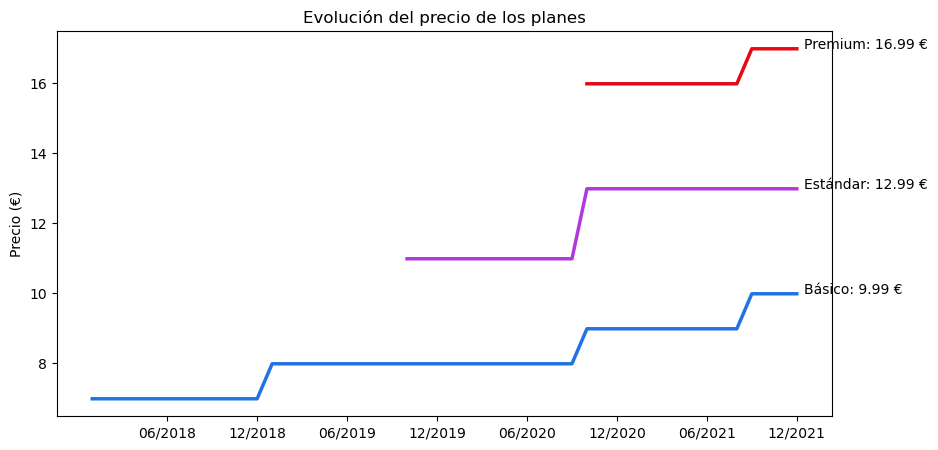

In [46]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con la evolución del precio de los planes ofrecidos
sns.lineplot(data=df_precio, x='AÑO-MES', y='PLAN BASICO', color='#2172E3', linewidth=2.5)
sns.lineplot(data=df_precio, x='AÑO-MES', y='PLAN ESTANDAR', color='#B038DC', linewidth=2.5)
sns.lineplot(data=df_precio, x='AÑO-MES', y='PLAN PREMIUM', color='#E50914', linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Evolución del precio de los planes')
plt.xlabel('')
plt.ylabel('Precio (€)')
plt.xticks(range(5, len(df_precio), 6)) # Intervalos de separación para las etiquetas en el eje x

# Último valor de cada línea
precio_basico = df_precio['PLAN BASICO'].iloc[-1]
precio_estandar = df_precio['PLAN ESTANDAR'].iloc[-1]
precio_premium = df_precio['PLAN PREMIUM'].iloc[-1]

# Leyenda de cada línea
plt.text(len(df_precio) - 0.5, precio_basico, f'Básico: {float(precio_basico)} €')
plt.text(len(df_precio) - 0.5, precio_estandar, f'Estándar: {float(precio_estandar)} €')
plt.text(len(df_precio) - 0.5, precio_premium, f'Premium: {float(precio_premium)} €')

plt.show()

In [47]:
df_fuentes_externas.tail(5)

,AÑO,MES,METEO TEMPERATURA MEDIA,METEO DIAS LLUVIA,TASA PARO,MOVILIDAD TERRITORIAL (NORMALIZADA),COMPETENCIA NUMERO COMPETIDORES,COMPETENCIA PRECIO MAX. SUSCRIPCION,COMPETENCIA PRECIO MIN. SUSCRIPCION
43,2021,8,24,8,"0,08","0,96",9,"24,99","4,99"
44,2021,9,23,10,"0,24","0,85",9,"24,99","4,99"
45,2021,10,18,14,"0,22","0,12",9,"24,99","4,99"
46,2021,11,10,10,"0,18","0,17",9,"24,99","4,99"
47,2021,12,7,6,"0,14","0,49",9,"24,99","4,99"


In [48]:
# Transformación de variable a tipo float
df_fuentes_externas['COMPETENCIA PRECIO MAX. SUSCRIPCION'] = df_fuentes_externas['COMPETENCIA PRECIO MAX. SUSCRIPCION'].str.replace(',', '.').astype(float)
df_fuentes_externas['COMPETENCIA PRECIO MIN. SUSCRIPCION'] = df_fuentes_externas['COMPETENCIA PRECIO MIN. SUSCRIPCION'].str.replace(',', '.').astype(float)

In [49]:
# Creación de columna 'Año-Mes'
df_fuentes_externas['AÑO-MES'] = df_fuentes_externas['MES'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x) + '/' + df_fuentes_externas['AÑO'].astype(str)

In [50]:
# Combinación de los datos del precio de Nerdflix con los de la competencia
df_precio_competencia = df_precio[['AÑO-MES','PLAN BASICO','PLAN ESTANDAR','PLAN PREMIUM']].merge(df_fuentes_externas[['AÑO-MES','COMPETENCIA PRECIO MIN. SUSCRIPCION','COMPETENCIA PRECIO MAX. SUSCRIPCION']], left_on='AÑO-MES', right_on='AÑO-MES', how='left')
df_precio_competencia.tail(5)

,AÑO-MES,PLAN BASICO,PLAN ESTANDAR,PLAN PREMIUM,COMPETENCIA PRECIO MIN. SUSCRIPCION,COMPETENCIA PRECIO MAX. SUSCRIPCION
43,08/2021,8.99,12.99,15.99,4.99,24.99
44,09/2021,9.99,12.99,16.99,4.99,24.99
45,10/2021,9.99,12.99,16.99,4.99,24.99
46,11/2021,9.99,12.99,16.99,4.99,24.99
47,12/2021,9.99,12.99,16.99,4.99,24.99


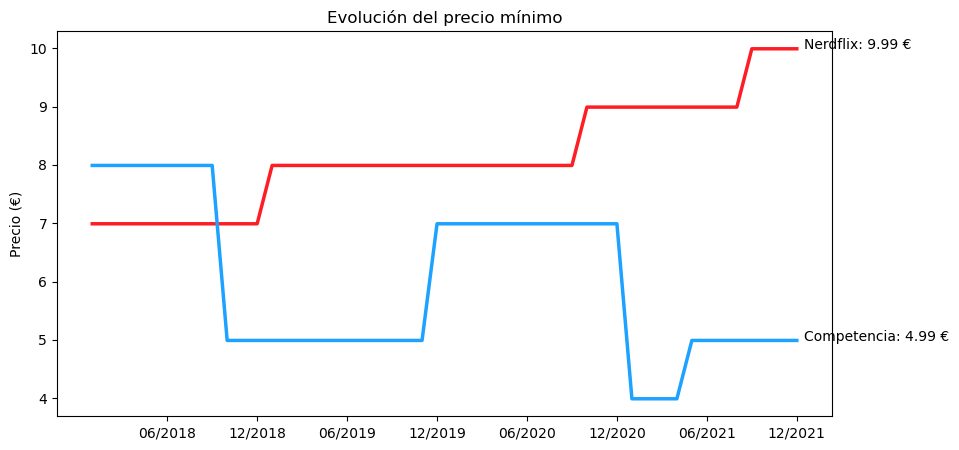

In [51]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de líneas con el precio mínimo de Nerdflix y de la competencia
sns.lineplot(x='AÑO-MES', y='PLAN BASICO', data=df_precio_competencia, color='#FF1D25', linewidth=2.5)
sns.lineplot(x='AÑO-MES', y='COMPETENCIA PRECIO MIN. SUSCRIPCION', data=df_precio_competencia, color='#1DA2FF', linewidth=2.5)

# Títulos y etiquetas de los ejes
plt.title('Evolución del precio mínimo')
plt.xlabel('')
plt.ylabel('Precio (€)')
plt.xticks(range(5, len(df_precio_competencia), 6)) # Intervalos de separación para las etiquetas en el eje x

# Último valor de cada línea
precio_min_nerdflix = df_precio_competencia['PLAN BASICO'].iloc[-1]
precio_min_competencia = df_precio_competencia['COMPETENCIA PRECIO MIN. SUSCRIPCION'].iloc[-1]

# Leyenda de cada línea
plt.text(len(df_precio_competencia) - 0.5, precio_min_nerdflix, f'Nerdflix: {float(precio_min_nerdflix)} €')
plt.text(len(df_precio_competencia) - 0.5, precio_min_competencia, f'Competencia: {float(precio_min_competencia)} €')

plt.show()

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Finalmente, es importante mencionar que, a lo largo del tiempo, todos los planes de Nerdflix han registrado incrementos en los precios. Por otra parte, la competencia ha reducido su coste, provocando que el plan más asequible de Nerdflix sea el doble de caro que el plan mínimo de la competencia.
</div>

## **3 - 🛠️ Definición del plan de acción**

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
Identificadas las causas del incremento de cancelaciones, se propone un plan de acción con el propósito de optimizar la retención de los usuarios del segmento A, que han visto afectada su experiencia por los cambios en la usabilidad de la televisión, y del segmento B, que ha mostrado su descontento debido a la disminución en el catálogo de películas de ciencia ficción. 
</div>

<div style="border: 5px solid #B00710; padding: 20px; font-size: 16px; background-color: rgba(229, 9, 20, 0.2);">
A continuación, se presentan las medidas específicas que se plantean para mejorar la experiencia y la satisfacción de los usuarios:

- <b>Ampliar el catálogo de ciencia ficción:</b> incrementar la variedad y cantidad de películas de ciencia ficción para satisfacer las preferencias de los clientes del segmento B.
 
- <b>Mejorar el algoritmo de recomendación:</b> optimizar el algoritmo de recomendación, priorizando las series de ciencia ficción y el contenido de fantasía, que han experimentado un crecimiento en el catálogo y es un contenido relevante para el segmento B.
    
- <b>Personalizar la interfaz:</b> diseñar una interfaz personalizada para cada segmento, refinando las sugerencias de contenido y ajustándolas a las preferencias únicas de los usuarios.
    
- <b>Espaciar en el tiempo los cambios en UX:</b> planificar las modificiaciones en la usabilidad de los dispositivos, especialmente de la televisión, de manera gradual y cuidadosa para evitar impactos bruscos en la experiencia de los usuarios.

- <b>Reforzar el soporte técnico:</b> aumentar el personal del servicio técnico para agilizar la respuesta a las incidencias, tratando de asegurar una resolución rápida y eficaz.
    
- <b>Ofrecer precios más competitivos o programas de fidelidad:</b> ajustar los precios para brindar una propuesta más competitiva en comparación con la competencia e implementar recompensas que los usuarios puedan canjear por contenido exclusivo o descuentos.
    
- <b>Establecer partnership con Movistar:</b> explorar una asociación estratégica con Movistar para integrar Nerdflix en su servicio de Internet.
    
- <b>Incluir encuesta de cancelación:</b> implementar una breve encuesta en el proceso de baja para recopilar información adicional que enriquezca futuros análisis.

</div>